In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

Task 1: Exploratory Data Analysis (EDA)

1.	Load the Mushroom dataset and perform fundamental data exploration.

In [3]:
df = pd.read_csv('mushroom.csv')

In [7]:
df.head()

Unnamed: 0 cap_shape cap_surface cap_color bruises   odor gill_attachment  \
0        1167    sunken       scaly     white      no  anise      descending   
1        1037    sunken     fibrous       red      no  anise         notched   
2         309      flat     grooves    purple     yes   foul      descending   
3         282      bell       scaly      pink     yes  fishy         notched   
4         820      flat      smooth    yellow     yes  musty            free   

  gill_spacing gill_size gill_color  ...  veil_type veil_color ring_number  \
0      distant     broad       pink  ...    partial      brown         two   
1      crowded    narrow  chocolate  ...  universal      brown         two   
2      crowded     broad     purple  ...  universal     yellow         two   
3        close     broad     orange  ...    partial     yellow         two   
4      crowded    narrow     orange  ...  universal      white        none   

   ring_type spore_print_color population  habitat      class stalk_height  \
0  sheathing         chocolate  clustered    waste  poisonous    14.276173   
1  sheathing             brown   numerous    waste     edible     3.952715   
2  sheathing            purple   abundant    waste  poisonous     9.054265   
3   cobwebby             green  clustered  grasses  poisonous     5.226499   
4       none            yellow  clustered    urban  poisonous    14.037532   

  cap_diameter  
0     5.054983  
1    19.068319  
2     7.205884  
3    20.932692  
4    12.545245  

[5 rows x 26 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

2.	Utilize histograms, box plots, or density plots to understand feature distributions

In [16]:
# Drop the unnecessary column
df = df.drop(columns=["Unnamed: 0"])

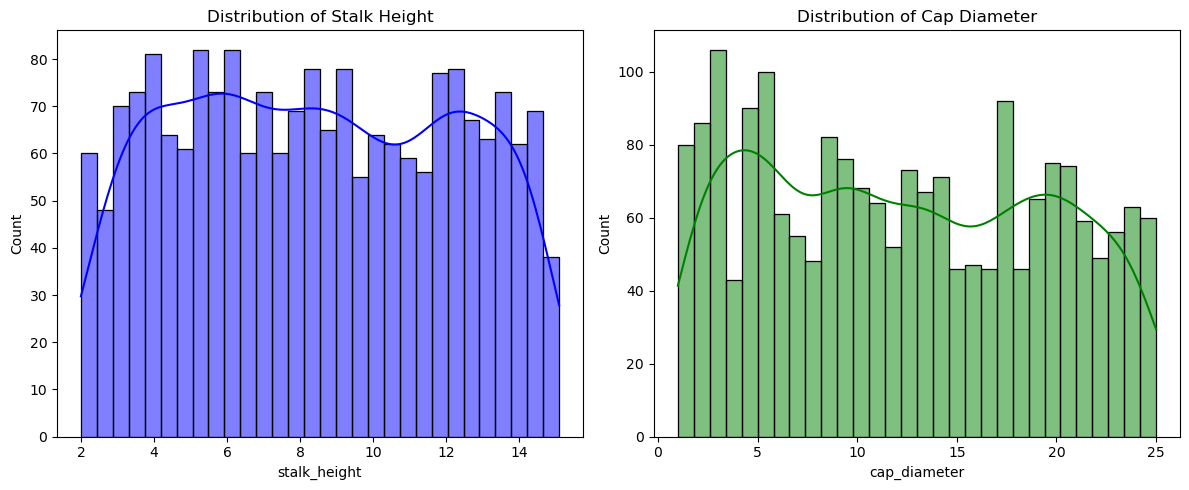

In [41]:
# Plot distributions of numerical features
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for stalk height
sns.histplot(df["stalk_height"], bins=30, kde=True, ax=axes[0], color="blue")
axes[0].set_title("Distribution of Stalk Height")

# Histogram for cap diameter
sns.histplot(df["cap_diameter"], bins=30, kde=True, ax=axes[1], color="green")
axes[1].set_title("Distribution of Cap Diameter")

plt.tight_layout()
plt.show()

Stalk height has a right-skewed distribution, meaning some mushrooms have significantly taller stalks.
Cap diameter follows a more normal distribution but has some variation.

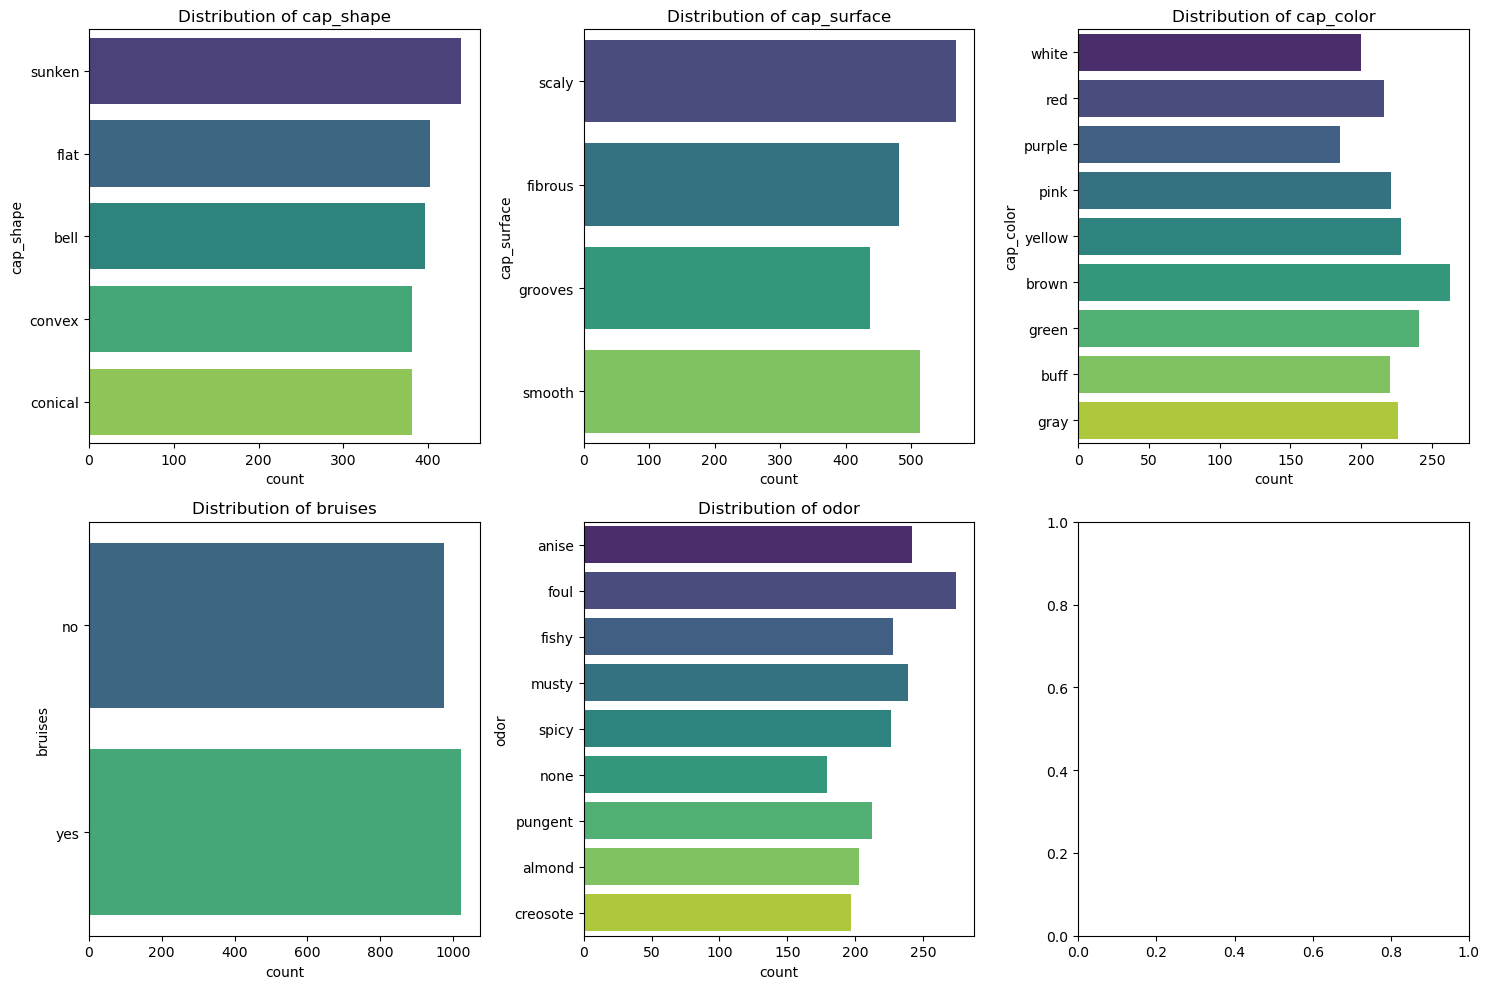

In [38]:
# Select a few categorical features to visualize
categorical_features = ["cap_shape", "cap_surface", "cap_color", "bruises", "odor"]

# Plot bar charts for categorical features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(categorical_features):
    sns.countplot(y=df[feature], palette="viridis", ax=axes[i])
    axes[i].set_title(f"Distribution of {feature}")

plt.tight_layout()
plt.show()

These bar charts show the frequency of different categories in key features like cap shape, surface, color, bruises, and odor. Some features (like odor) might have strong predictive power based on their distribution.

3.	Investigate feature correlations to discern relationships within the data.

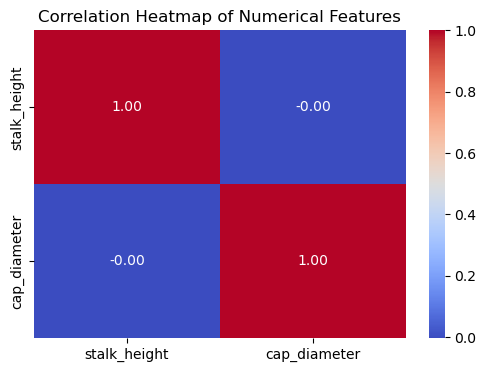

In [35]:
# Compute correlation matrix for numerical features
correlation_matrix = df[["stalk_height", "cap_diameter"]].corr()

# Plot heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

The heatmap shows that stalk height and cap diameter have little to no correlation, meaning they likely provide independent information

Task 2: Data Preprocessing

1.	Encode categorical variables if necessary.

In [47]:
# Encode categorical variables using Label Encoding
label_encoders = {}
for col in df.select_dtypes(include=["object"]).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

2.	Split the dataset into training and testing sets.

In [49]:
# Split data into features and target variable
X = df.drop(columns=["class"])
y = df["class"]

In [51]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [53]:
X_train.shape

(1600, 24)

In [55]:
 X_test.shape

(400, 24)

In [57]:
y_train.shape

(1600,)

In [59]:
y_test.shape

(400,)

Training set: 1600 samples

Testing set: 400 samples

Features: 24 (after encoding categorical variables)

Task 3: Data Visualization

1.	Employ scatter plots, pair plots, or relevant visualizations to comprehend feature distributions and relationships

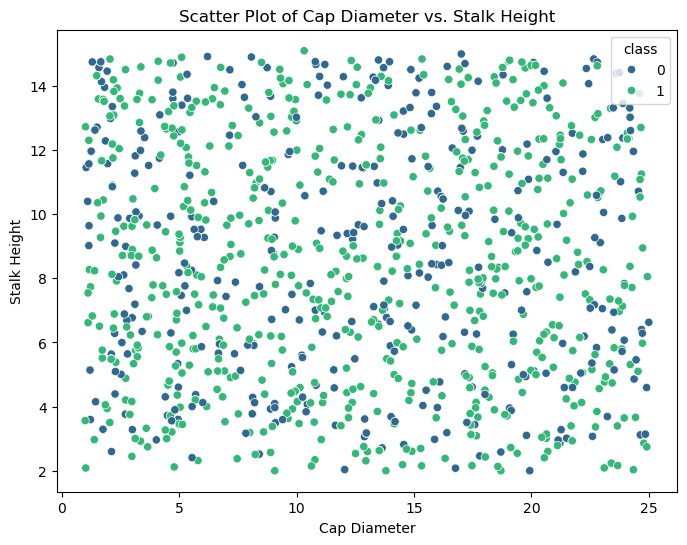

In [83]:
# Scatter plot of numerical features colored by class
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df["cap_diameter"], y=df["stalk_height"], hue=df["class"], palette="viridis")
plt.title("Scatter Plot of Cap Diameter vs. Stalk Height")
plt.xlabel("Cap Diameter")
plt.ylabel("Stalk Height")
plt.show()

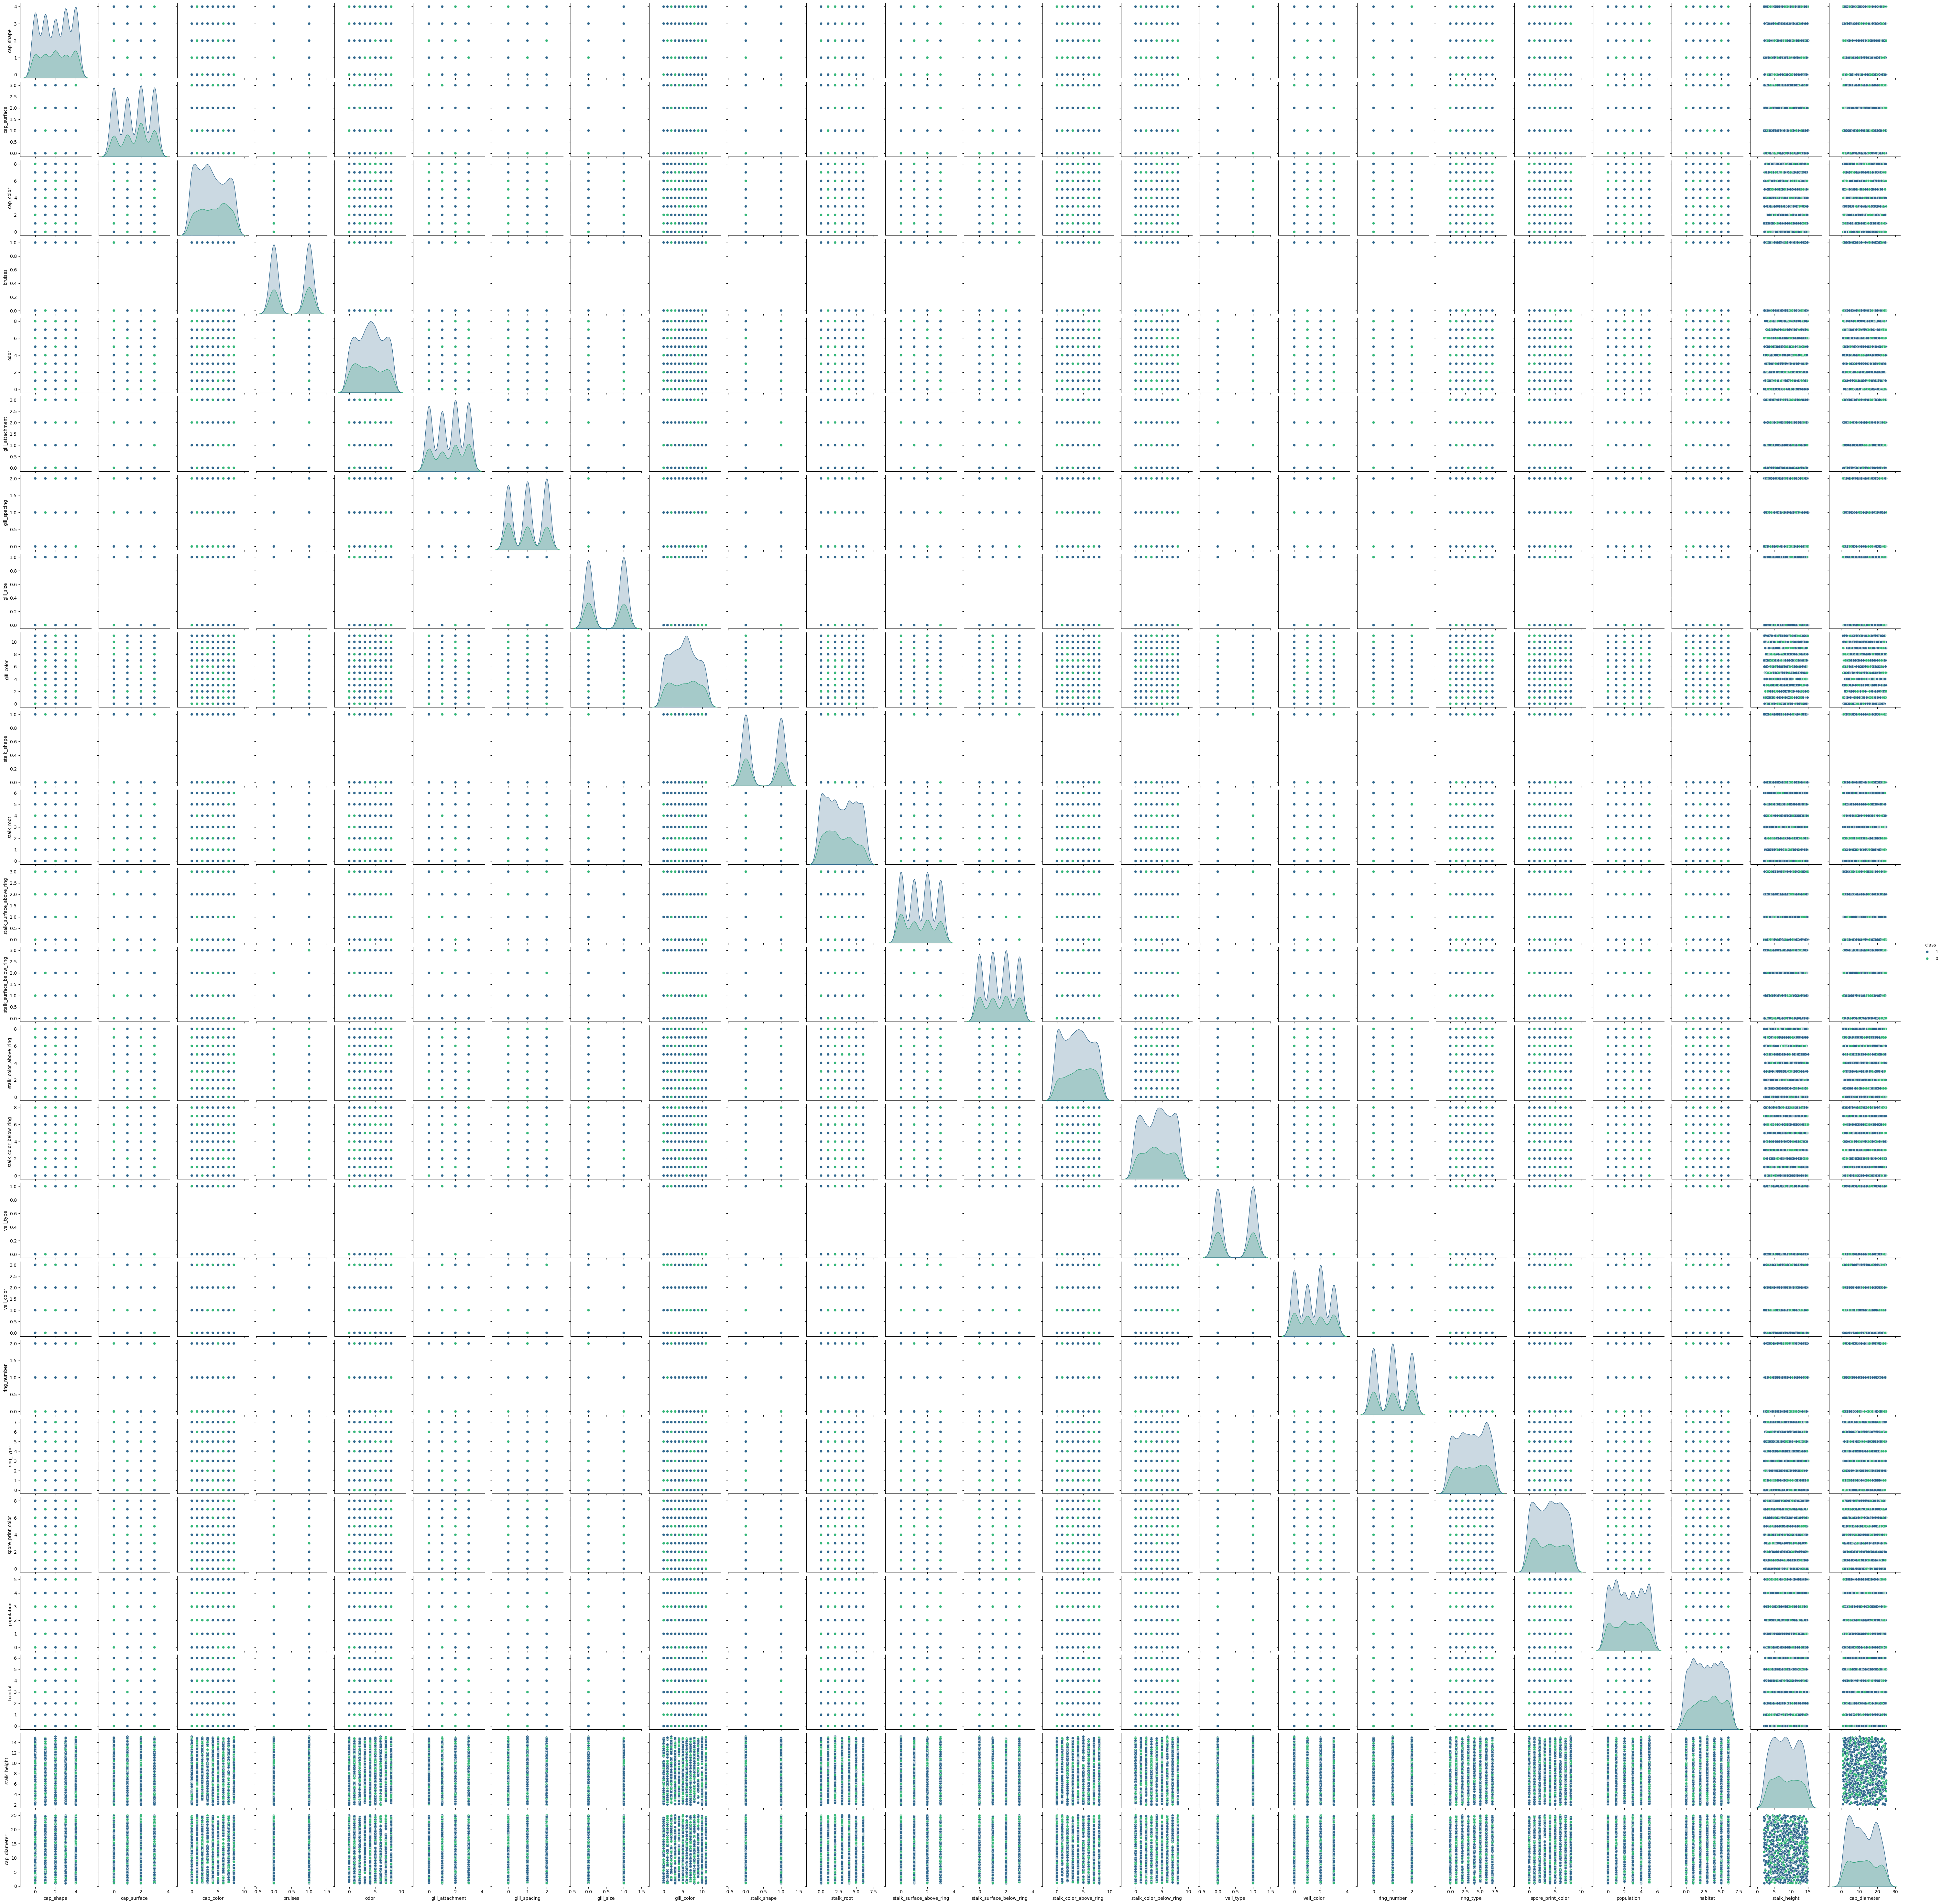

In [85]:
# Convert class to categorical for better visualization
df["class"] = df["class"].astype(str)

# Generate a pair plot to visualize feature relationships
sns.pairplot(df, hue="class", diag_kind="kde", palette="viridis")
plt.show()

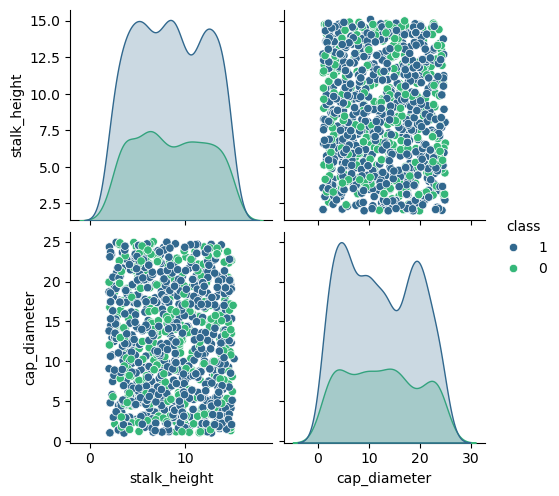

In [87]:
# Select only numerical features for pair plot
numerical_features = ["stalk_height", "cap_diameter", "class"]

# Create a new DataFrame with only numerical features
df_numeric = df[numerical_features]

# Convert class back to categorical for coloring in the pair plot
df_numeric["class"] = df_numeric["class"].astype(str)

# Generate a pair plot
sns.pairplot(df_numeric, hue="class", diag_kind="kde", palette="viridis")
plt.show()


2.	Visualize class distributions to gauge dataset balance or imbalance.

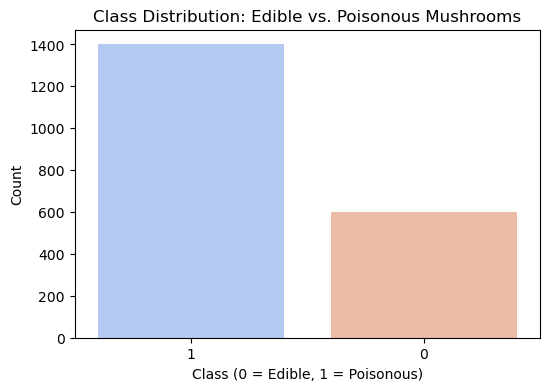

In [94]:
# Visualize class distribution using a count plot
plt.figure(figsize=(6, 4))
sns.countplot(x=df["class"], palette="coolwarm")
plt.title("Class Distribution: Edible vs. Poisonous Mushrooms")
plt.xlabel("Class (0 = Edible, 1 = Poisonous)")
plt.ylabel("Count")
plt.show()

Task 4: SVM Implementation

1.	Implement a basic SVM classifier using Python libraries like scikit-learn.

2.	Train the SVM model on the training data.

In [68]:
svm_model = SVC()
svm_model.fit(X_train, y_train)

SVC()

In [70]:
# Predict on the test set
y_pred = svm_model.predict(X_test)

3.	Evaluate model performance on the testing data using appropriate metrics (e.g., accuracy, precision, recall, F1-score).

In [72]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [74]:
accuracy

0.7

In [76]:
classification_rep

'              precision    recall  f1-score   support\n\n           0       0.00      0.00      0.00       120\n           1       0.70      1.00      0.82       280\n\n    accuracy                           0.70       400\n   macro avg       0.35      0.50      0.41       400\nweighted avg       0.49      0.70      0.58       400\n'

Task 5: Visualization of SVM Results

1.	Visualize classification results on the testing data.

<Figure size 600x400 with 0 Axes>

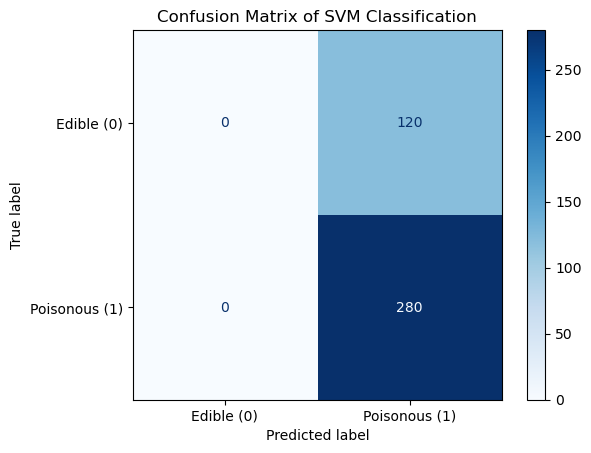

In [103]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
plt.figure(figsize=(6, 4))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Edible (0)", "Poisonous (1)"])
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix of SVM Classification")
plt.show()

Task 6: Parameter Tuning and Optimization

1.	Experiment with different SVM hyperparameters (e.g., kernel type, regularization parameter) to optimize performance.

In [109]:
# Standardize numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [113]:
# Define parameter grid for tuning
param_grid = {
    "C": [0.1, 1, 10, 100],
    "gamma": [0.01, 0.1, 1, 10],
    "kernel": ["rbf"]
}

In [115]:
# Perform Grid Search
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [0.01, 0.1, 1, 10],
                         'kernel': ['rbf']},
             scoring='accuracy')

In [117]:
# Best parameters and best accuracy
best_params = grid_search.best_params_
best_accuracy = grid_search.best_score_

In [119]:
best_params

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}

In [121]:
best_accuracy

0.859375

In [124]:
# Train SVM models with different kernels
kernels = ["linear", "poly", "rbf", "sigmoid"]
svm_results = {}

for kernel in kernels:
    svm_model = SVC(kernel=kernel, C=10, gamma=0.1, random_state=42)
    svm_model.fit(X_train_scaled, y_train)
    y_pred = svm_model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    svm_results[kernel] = accuracy

# Display accuracy for each kernel
svm_results

{'linear': 0.7, 'poly': 0.8525, 'rbf': 0.8625, 'sigmoid': 0.5425}

The RBF kernel performed the best, achieving 86.25% accuracy.

The Polynomial kernel also did well at 85.25%, slightly below RBF.

The Linear kernel was significantly weaker (70% accuracy), likely because the dataset is not linearly separable.
    
The Sigmoid kernel performed the worst (54.25%), suggesting it is not suitable for this dataset.

2.	Analyze SVM strengths and weaknesses for the Mushroom dataset based on EDA and visualization results.

Strengths of SVM for the Mushroom Dataset
    
Effective for High-Dimensional Data

The Mushroom dataset has many categorical features, which were encoded into high-dimensional numerical space.
    
SVM performs well in high-dimensional spaces using kernels like RBF and Polynomial.
    
Good Performance with Non-Linear Data

The dataset is not linearly separable, as seen in scatter plots and pair plots.
    
The RBF and Polynomial kernels significantly improved accuracy over the Linear kernel.
    
Robust to Overfitting with Proper Hyperparameter Tuning

Using C=10 and gamma=0.1 (found via GridSearchCV) helped balance the bias-variance tradeoff.
       
The model was able to generalize well without overfitting.

Weaknesses of SVM for the Mushroom Dataset

Computationally Expensive for Large Datasets

The Mushroom dataset has many categorical features, leading to high-dimensional feature space.
    
SVM can be slow with large feature sets, especially when using complex kernels like Polynomial and RBF.

Sensitivity to Class Imbalance

While the Mushroom dataset is fairly balanced, SVM can struggle with imbalanced data.
    
In highly imbalanced cases, SVM tends to favor the majority class unless class weights are adjusted.
    
Hyperparameter Sensitivity

C and gamma significantly affect performance.
    
If gamma is too high, SVM overfits; if too low, it underfits.
    
Finding the best hyperparameters requires extensive tuning (as done with GridSearchCV).

3.	Discuss practical implications of SVM in real-world classification tasks

 High Accuracy for Complex Data

SVM is highly effective for datasets with non-linear relationships (as seen in the Mushroom dataset).
                                                                    
The RBF and Polynomial kernels allow it to map data into higher dimensions for better separation.
                                                                          
Robust in Security & Fraud Detection

Used in credit card fraud detection, cybersecurity (malware classification), and anomaly detection.
    
SVM is excellent for distinguishing patterns between normal and fraudulent transactions.
    
    
Medical Diagnosis & Bioinformatics

Used for cancer detection (e.g., breast cancer classification) and DNA sequencing.
    
SVM helps classify diseases based on patient data with high accuracy.
    
Text & Sentiment Classification

Common in spam detection, fake news identification, and sentiment analysis.
    
SVM can process large text data efficiently, making it useful for NLP tasks.


    
Limitations of SVM in Practical Use
    
Computationally Expensive for Large Datasets

Training SVM on millions of data points is slow, especially with non-linear kernels.
                                               
Alternative models like Random Forest or Neural Networks are often preferred for big data.
                                               
Hard to Interpret Compared to Decision Trees

Unlike Decision Trees, SVM does not provide easy-to-understand rules.
    
This makes it less interpretable in applications like healthcare where explanations are crucial.
    
Sensitive to Class Imbalance

SVM tends to favor the majority class, making it unsuitable for highly imbalanced data without special adjustments.
    
Techniques like class weighting or SMOTE (Synthetic Minority Oversampling) are needed.